<a href="https://colab.research.google.com/github/claujoppert/AutoInsurance/blob/main/AutoInsurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Automobile Insurance Data Analysis

In [3]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
#Load the data
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Case/auto.csv')
df.head()

,index,NAIC,Company Name,Ratio,Upheld Complaints,Question of Fact Complaints,Not Upheld Complaints,Total Complaints,Premiums Written (in Millions),Rank,Filing Year
0,0,32786,Progressive Specialty Insurance Company,0.0,0,17,29,46,204.173,1,2016
1,1,19976,Amica Mutual Insurance Company,0.0,0,9,8,17,84.769,2,2016
2,2,25453,Nationwide Insurance Company of America,0.0,0,9,4,13,65.335,3,2016
3,3,15024,Preferred Mutual Insurance Company,0.0,0,3,2,5,62.505,4,2016
4,4,10052,Chubb National Insurance Company,0.0,0,1,2,3,46.735,5,2016


Light data cleaning - checking for null values or duplicates and the data types of each column

In [10]:
#Check for missing values
df.isnull().sum()

,0
index,0
NAIC,0
Company Name,0
Ratio,0
Upheld Complaints,0
Question of Fact Complaints,0
Not Upheld Complaints,0
Total Complaints,0
Premiums Written (in Millions),0
Rank,0


In [11]:
#Check for duplicate values
df.duplicated().sum()

0

In [12]:
#Check data types of each column
df.dtypes

,0
index,int64
NAIC,int64
Company Name,object
Ratio,float64
Upheld Complaints,int64
Question of Fact Complaints,int64
Not Upheld Complaints,int64
Total Complaints,int64
Premiums Written (in Millions),float64
Rank,int64


Light exploratory data analysis

In [16]:
#Group by filing year and count the number of companies included
complaints_by_year = df.groupby('Filing Year')['index'].count()
complaints_by_year

,index
Filing Year,
2009,181
2010,179
2011,169
2012,172
2013,171
2014,170
2015,158
2016,158


In [33]:
#Group by Company Name and count the total complaints
complaints_by_company = df.groupby('Company Name')['Total Complaints'].sum()
complaints_by_company

,Total Complaints
Company Name,
21st Century Advantage Insurance Company,85
21st Century Centennial Insurance Company,63
21st Century Indemnity Insurance Company,72
21st Century Insurance Company,63
21st Century National Insurance Company,90
...,...
Victoria Automobile Insurance Company,10
Victoria Fire & Casualty Company,21
Vigilant Insurance Company,3


In [36]:
import random
#Group by Company Name and count total complaints
complaints_by_company = df.groupby('Company Name')['Total Complaints'].sum()

#Get a list of company names
companies = list(complaints_by_company.index)

#Select 5 random companies
random_companies = random.sample(companies, 5)

#Print the selected companies and their total complaints
for company in random_companies:
  print(f"Company: {company}, Total Complaints: {complaints_by_company[company]}")

Company: Praetorian Insurance Company, Total Complaints: 168
Company: Progressive Casualty Insurance Company, Total Complaints: 682
Company: Property and Casualty Insurance Company of Hartford, Total Complaints: 12
Company: Allstate Fire and Casualty Insurance Company, Total Complaints: 343
Company: 21st Century Security Insurance Company, Total Complaints: 26


In [44]:
# Group by Company Name and sum total complaints
complaints_by_company = df.groupby('Company Name')['Total Complaints'].sum()

# Sort by total complaints in descending order and get the top 5
top_5_companies = complaints_by_company.sort_values(ascending=False).head(5)

# Print the top 5 companies and their total complaints
top_5_companies

,Total Complaints
Company Name,
Allstate Insurance Company,4949
GEICO General Insurance Company,3898
Country-Wide Insurance Company,3086
State Farm Mutual Automobile Insurance Company,2629
GEICO Indemnity Company,2057


In [42]:
#Filter data for the year 2016
df_2016 = df[df['Filing Year'] == 2016]

#Group by company and sum total complaints for 2016
complaints_by_company_2016 = df_2016.groupby('Company Name')['Total Complaints'].sum()

#Find the company with the most complaints in 2016
company_with_most_complaints_2016 = complaints_by_company_2016.idxmax()
max_complaints_2016 = complaints_by_company_2016.max()

print(f"The company with the most complaints in 2016 is {company_with_most_complaints_2016} with {max_complaints_2016} complaints.")

The company with the most complaints in 2016 is GEICO General Insurance Company with 503 complaints.


In [43]:
#Find the most recent filing year
most_recent_year = df['Filing Year'].max()

print(f"The most recent filing year is: {most_recent_year}")

The most recent filing year is: 2016


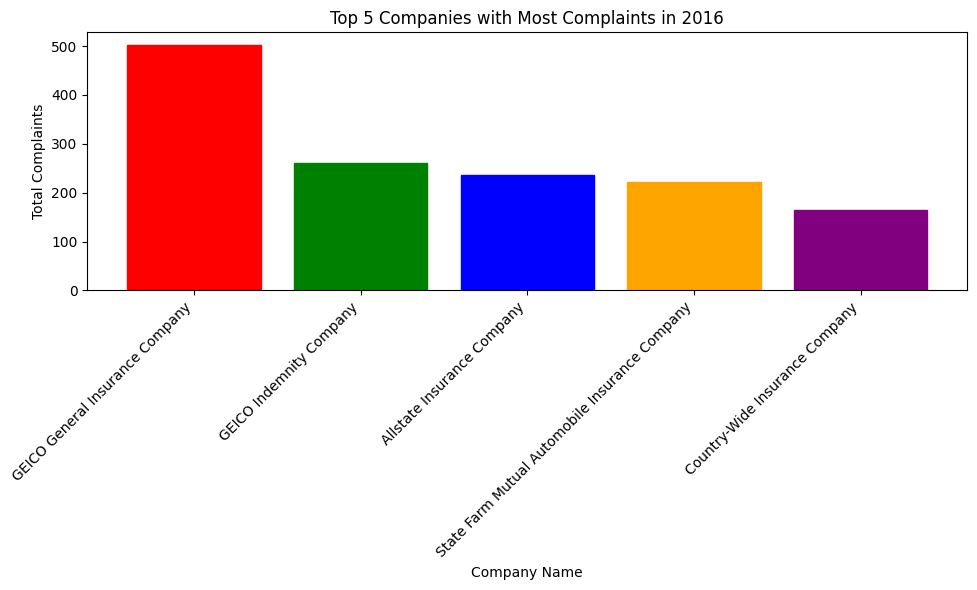

In [61]:
# Filter data for 2016
df_2016 = df[df['Filing Year'] == 2016]

# Group by company and sum total complaints for 2016
complaints_by_company_2016 = df_2016.groupby('Company Name')['Total Complaints'].sum()

# Get the top 5 companies
top_5_2016 = complaints_by_company_2016.sort_values(ascending=False).head(5)

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_2016.index, top_5_2016.values)

# Customize colors for each bar
colors = ['red', 'green', 'blue', 'orange', 'purple']
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.xlabel("Company Name")
plt.ylabel("Total Complaints")
plt.title("Top 5 Companies with Most Complaints in 2016")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

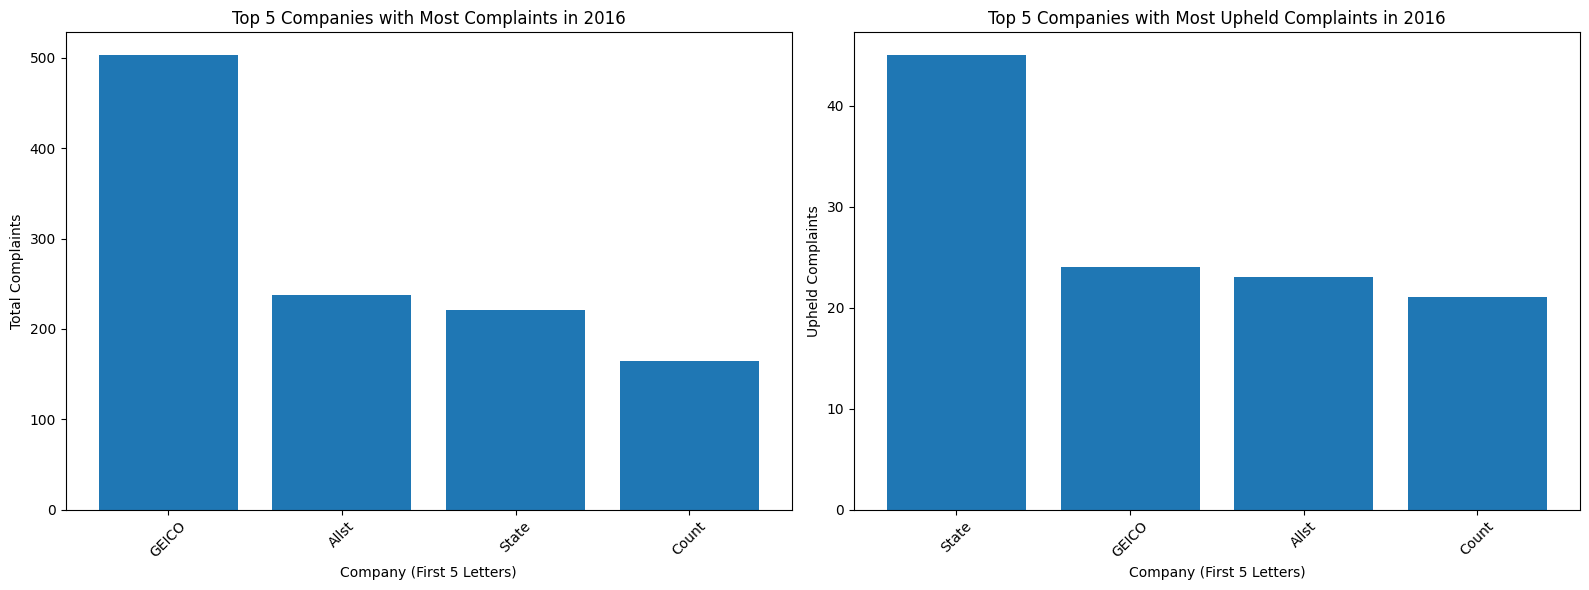

In [67]:
# Group by company and sum total complaints and upheld complaints for 2016
complaints_2016 = df_2016.groupby('Company Name').agg({'Total Complaints': 'sum', 'Upheld Complaints': 'sum'})

# Get the top 5 companies by total complaints
top_5_total_complaints = complaints_2016.sort_values('Total Complaints', ascending=False).head(5)

# Get the top 5 companies by upheld complaints
top_5_upheld_complaints = complaints_2016.sort_values('Upheld Complaints', ascending=False).head(5)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Total Complaints
axes[0].bar(top_5_total_complaints.index.str[:5], top_5_total_complaints['Total Complaints'])
axes[0].set_xlabel("Company (First 5 Letters)")
axes[0].set_ylabel("Total Complaints")
axes[0].set_title("Top 5 Companies with Most Complaints in 2016")
axes[0].tick_params(axis='x', rotation=45)


# Plot 2: Upheld Complaints
axes[1].bar(top_5_upheld_complaints.index.str[:5], top_5_upheld_complaints['Upheld Complaints'])
axes[1].set_xlabel("Company (First 5 Letters)")
axes[1].set_ylabel("Upheld Complaints")
axes[1].set_title("Top 5 Companies with Most Upheld Complaints in 2016")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Observation: the top 5 companies with the total most complaints are also the top 5 companies with the most upheld complaints.
